# Exercício 5

Importando as bibliotecas necessárias e a base de dados `cd_brasil.csv`:

In [2]:
suppressPackageStartupMessages(library("dplyr"))
suppressPackageStartupMessages(library("scales"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("janitor"))
estados <- read.csv("cd_brasil.csv")

head(estados)

,estado,regiao,superficie,populacao,densidade
,<chr>,<chr>,<dbl>,<int>,<dbl>
1,RO,Norte,237576.2,1453756,6.12
2,AC,Norte,164165.2,653385,3.98
3,AM,Norte,1559161.8,3221940,2.07
4,RR,Norte,224299.0,395725,1.76
5,PA,Norte,1247689.5,7065573,5.66
6,AP,Norte,142814.6,587311,4.11


## Distribuição de frequencia das variáveis população e densidade populacional

In [4]:
estados %>% mutate(cat_populacao = cut(populacao, breaks = c(-Inf, 5e+06, 1e+07, 
    Inf), labels = c("0 até 5M", "5M até 10M", "10M até 50M")), cat_densidade = cut(densidade, 
    breaks = c(-Inf, 50, 100, Inf), labels = c("0 até 50", "50 até 100", "100 até 500"))) %>% 
    tabyl(cat_populacao, cat_densidade) %>% adorn_title

,cat_densidade,,
<chr>,<chr>,<chr>,<chr>
cat_populacao,0 até 50,50 até 100,100 até 500
0 até 5M,9,4,2
5M até 10M,3,3,0
10M até 50M,3,1,2


## Quantis da variável população

In [5]:
quantis <- c(0.1, 0.25, 0.5, 0.75, 0.9)

estados %>% summarize(quantil = percent(quantis), populacao = quantile(populacao, 
    probs = quantis))

quantil,populacao
<chr>,<dbl>
10%,1007530
25%,2360858
50%,3351669
75%,8335944
90%,14616582


## Desenhe o bosxplot e faça comentários

É possível observar que a região sudeste possui uma variabilidade de população muito maior que as outras regiões.

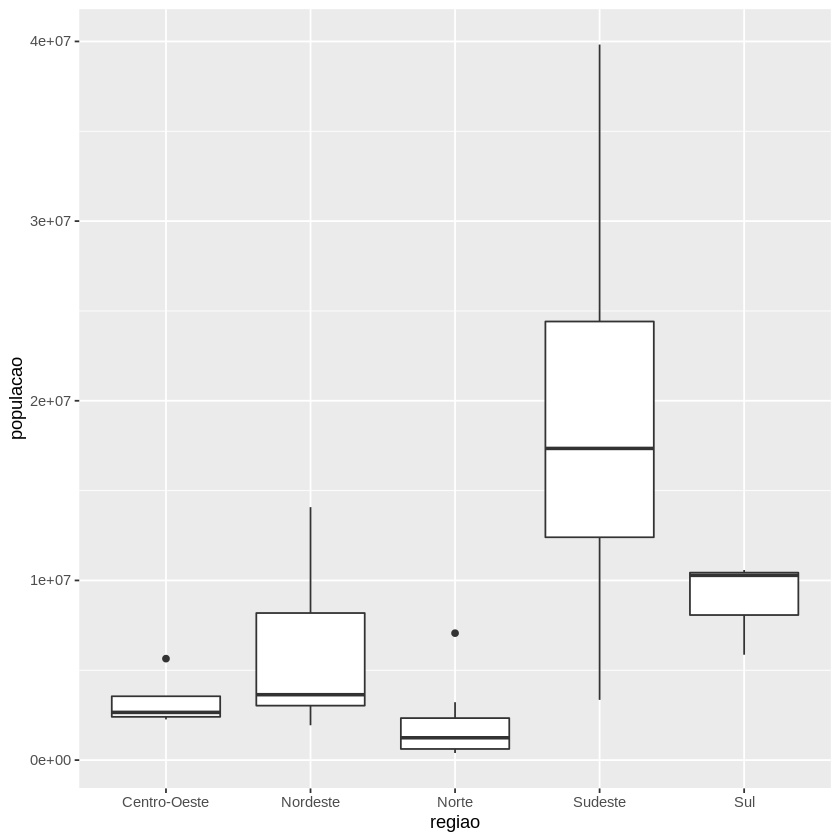

In [37]:
estados %>% ggplot(aes(x = regiao, y = populacao)) + geom_boxplot()

## Represente graficamente a população por regiões geográficas

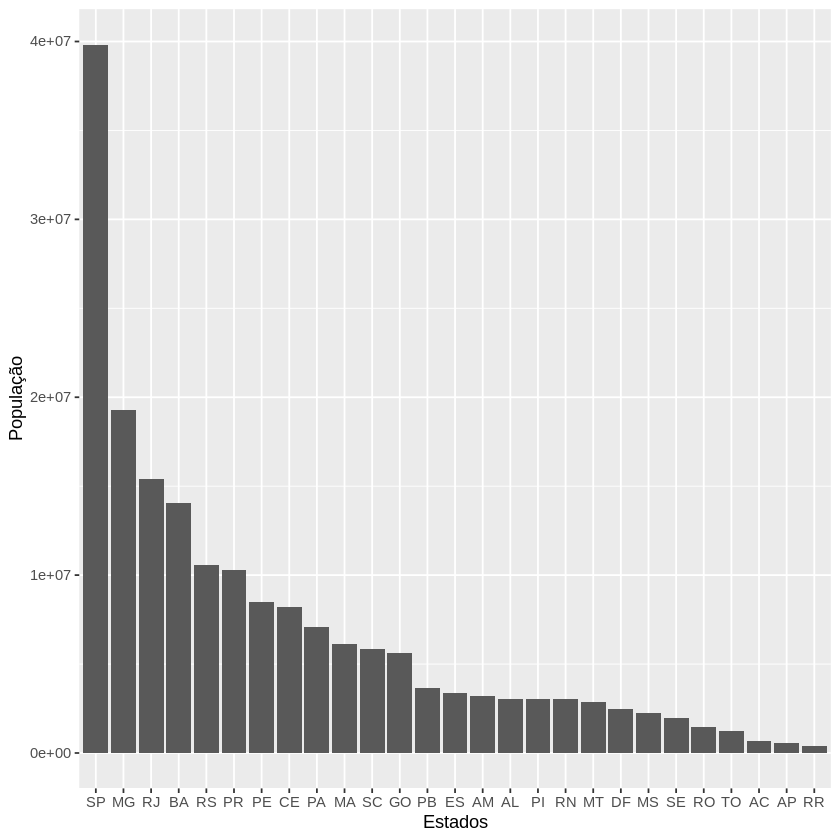

In [5]:
estados %>% ggplot(aes(x = reorder(estado, -populacao), y = populacao)) + geom_col() + 
    xlab("Estados") + ylab("População")